In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('used_cars.csv')

In [7]:
df.head()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,New Delhi,2017,Mahindra,TUV300 T8,Manual,"19,065 km",Diesel,1st Owner,"₹6,95,099"
1,New Delhi,2018,Maruti,Vitara Brezza VDI OPT,Manual,"50,742 km",Diesel,1st Owner,"₹7,16,999"
2,New Delhi,2016,Hyundai,Creta 1.6 SX CRDI,NaN,"1,99,598 km",Diesel,1st Owner,"₹7,25,899"
3,New Delhi,2016,Hyundai,Creta 1.6 SX (O) CRDI,NaN,"53,957 km",Diesel,1st Owner,"₹8,94,399"
4,New Delhi,2015,Maruti,S Cross ALPHA 1.3,Manual,"94,544 km",Diesel,1st Owner,"₹5,32,899"


# EDA

In [8]:
df.columns

Index(['LOCATION', 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM',
       'FUELTYPE', 'NOOF_OWNERS', 'PRICE'],
      dtype='object')

In [9]:
df.LOCATION.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad'], dtype=object)

In [10]:
df.MNF_YEAR.unique()

array([2017, 2018, 2016, 2015, 2013, 2014, 2020, 2019, 2012, 2021, 2011,
       2009, 2010, 2008], dtype=int64)

In [11]:
df.BRAND.unique()

array(['Mahindra', 'Maruti', 'Hyundai', 'Toyota', 'Honda', 'Ford',
       'Renault', 'Tata', 'Skoda', 'BMW', 'Mercedes', 'Volvo', 'Datsun',
       'Volkswagen', 'Audi', 'Ssangyong', 'Nissan', 'Jeep', 'Landrover',
       'Jaguar'], dtype=object)

In [12]:
df.VARIANT.unique()

array(['Manual', nan, 'Automatic'], dtype=object)

In [13]:
df.NOOF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object)

In [14]:
df.duplicated().sum()

2827

In [15]:
df.isnull().sum()

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        254
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

# Cleaning the Data

In [16]:
df = df.drop_duplicates() #Because we have too many duplicate records we will detete them to have a good model

In [17]:
df.isnull().sum()

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        131
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

From above we can see that the only in VARIANT we have values missing so we will change VARIANT nan values as NOT MENTIONED

# Mathematical/ Analytical Modeling of the Data

In [18]:
df['VARIANT'] = df['VARIANT'].fillna('NOT MENTIONED')

In [19]:
DF = df.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['LOCATION' , 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUELTYPE' , 'NOOF_OWNERS' ]

for i in catagorical_data:
    DF[i]=DF[i].astype('str')
    DF[i]=LE.fit_transform(DF[i])

In [21]:
DF['PRICE'] = DF['PRICE'].str.replace(r'\D', '').astype(int)
DF['DRIVEN_KM'] = DF['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

In [22]:
DF.describe()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
count,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4211.000000,4.211000e+03
mean,5.077654,8.298979,8.586796,267.963667,0.907148,47098.023510,0.661838,0.205652,6.240894e+05
std,2.951050,2.295125,3.821959,170.643670,0.382731,34839.406487,0.495216,0.451944,3.066061e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,1.263990e+05
25%,3.000000,7.000000,5.000000,124.000000,1.000000,21592.500000,0.000000,0.000000,4.150490e+05
50%,6.000000,9.000000,10.000000,250.000000,1.000000,39484.000000,1.000000,0.000000,5.535990e+05
75%,8.000000,10.000000,10.000000,425.500000,1.000000,64355.000000,1.000000,0.000000,7.572490e+05
max,9.000000,13.000000,19.000000,563.000000,2.000000,276914.000000,3.000000,3.000000,2.760299e+06


In [23]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4211 entries, 0 to 7037
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LOCATION     4211 non-null   int32
 1   MNF_YEAR     4211 non-null   int32
 2   BRAND        4211 non-null   int32
 3   MODEL        4211 non-null   int32
 4   VARIANT      4211 non-null   int32
 5   DRIVEN_KM    4211 non-null   int32
 6   FUELTYPE     4211 non-null   int32
 7   NOOF_OWNERS  4211 non-null   int32
 8   PRICE        4211 non-null   int32
dtypes: int32(9)
memory usage: 180.9 KB


# Correlation of the Data

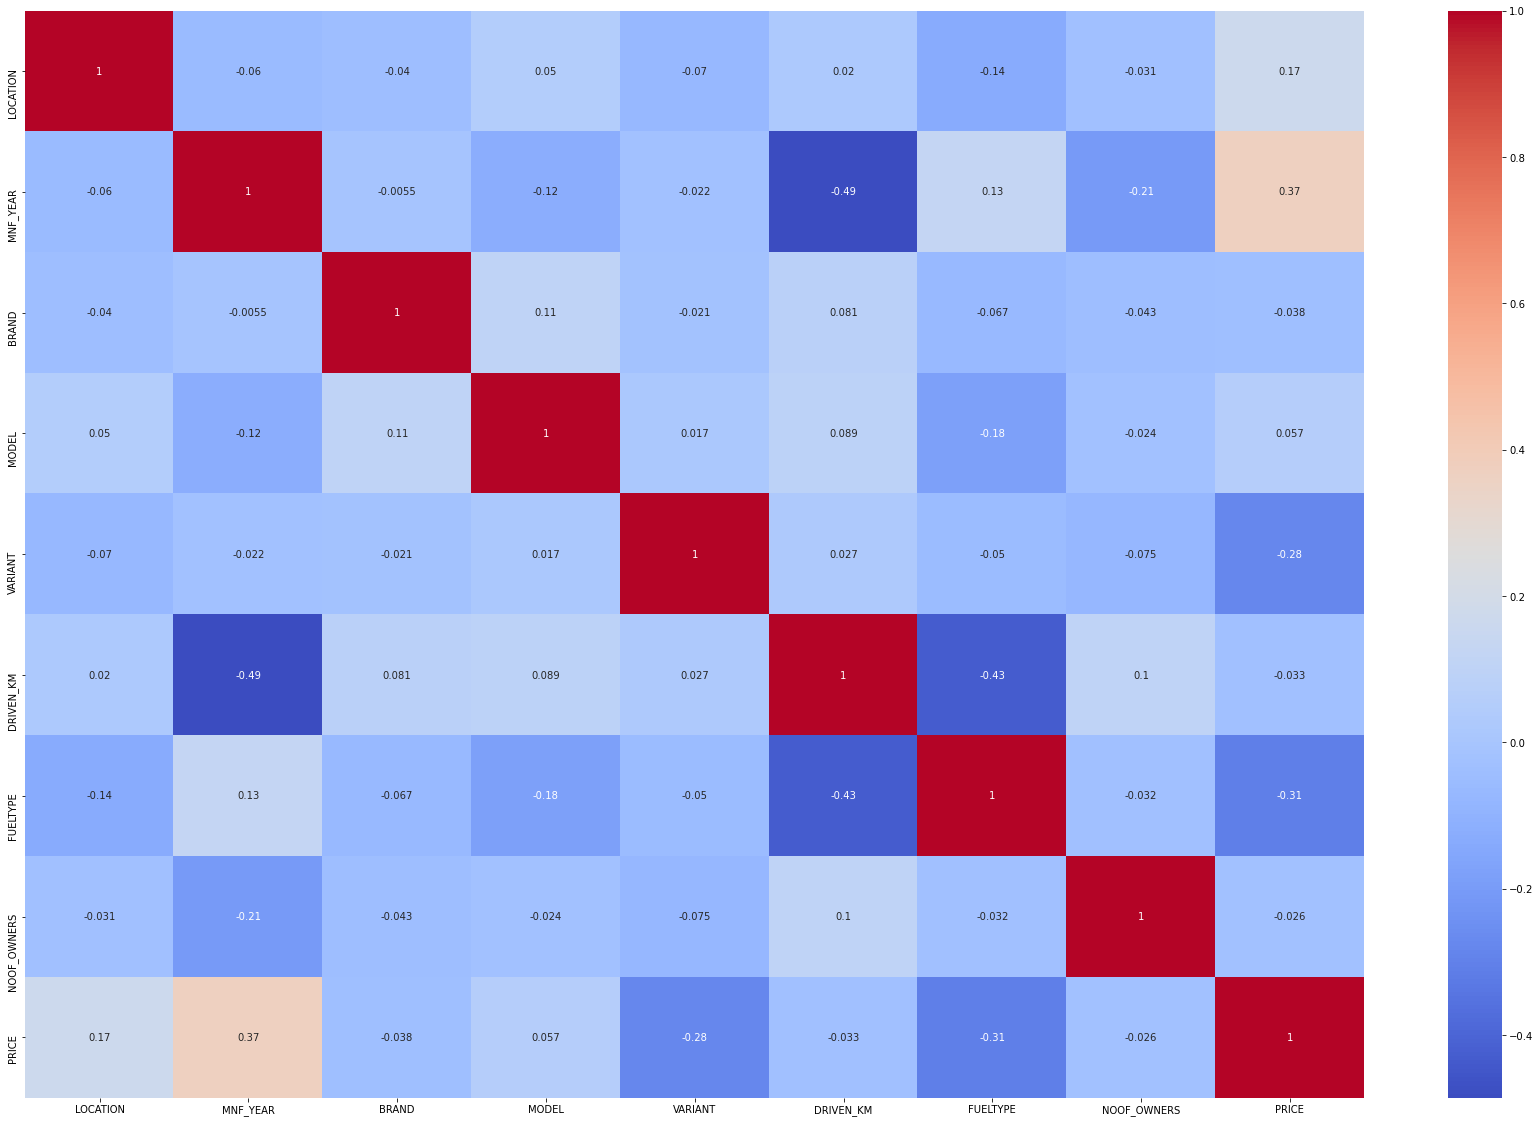

In [24]:
plt.figure(figsize=(30,20))
sns.heatmap(DF.corr(), annot = True, cmap= "coolwarm")
plt.show()

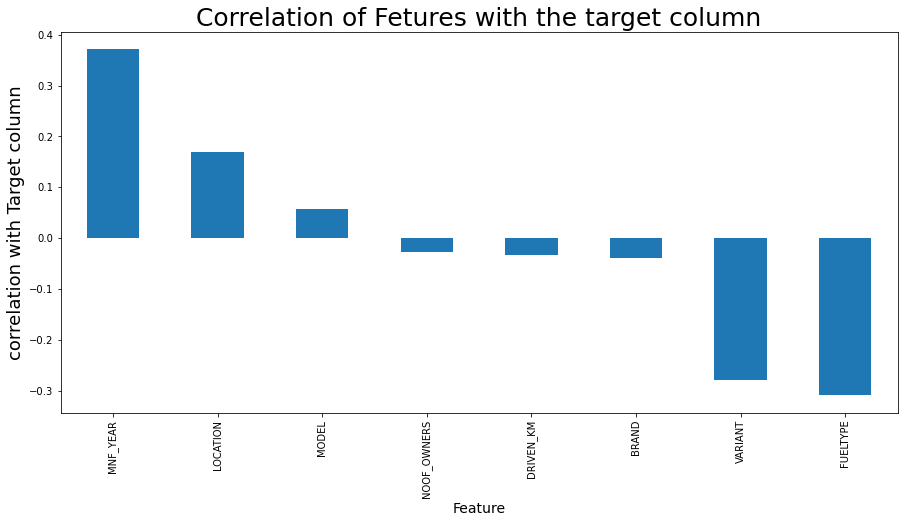

KEY OBSERVATIONS:
 


,PRICE
MNF_YEAR,0.371090
LOCATION,0.168544
MODEL,0.056549
NOOF_OWNERS,-0.026233
DRIVEN_KM,-0.032768
BRAND,-0.038479
VARIANT,-0.277682
FUELTYPE,-0.308609


In [25]:
plt.figure(figsize=(15,7))
DF.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(DF.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

From above we can clearly see that MNF_YEAR is postivly correlated to PRICE and FUEL_TYPE and VARIENT is negative corelated to PRICE

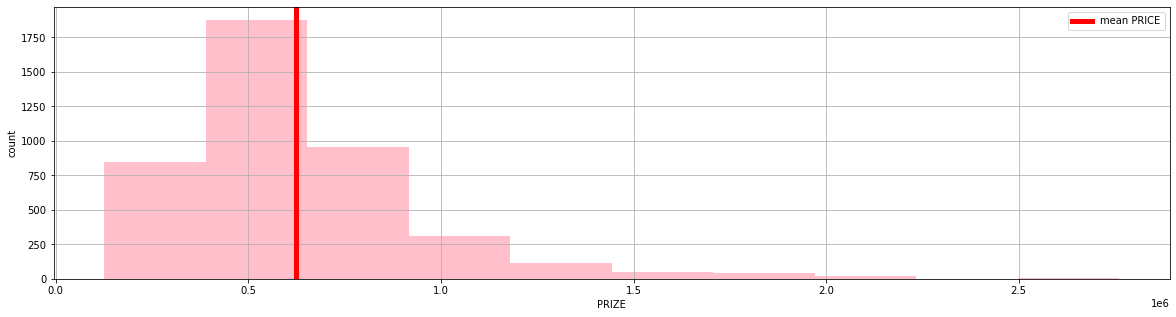

MATHEMATICAL SUMMARY OF PRIZE :
 count    4.211000e+03
mean     6.240894e+05
std      3.066061e+05
min      1.263990e+05
25%      4.150490e+05
50%      5.535990e+05
75%      7.572490e+05
max      2.760299e+06
Name: PRICE, dtype: float64


In [26]:
DF.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRIZE")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.PRICE.describe())

Key observations:
Mean of the prize is Rs: 5,33,047, the prize is distributed between Rs: 99,162 to Rs: 41,00,000.
Above we can understand that most of the Car price is leser than the Mean i.e Rs: 5,33,047.

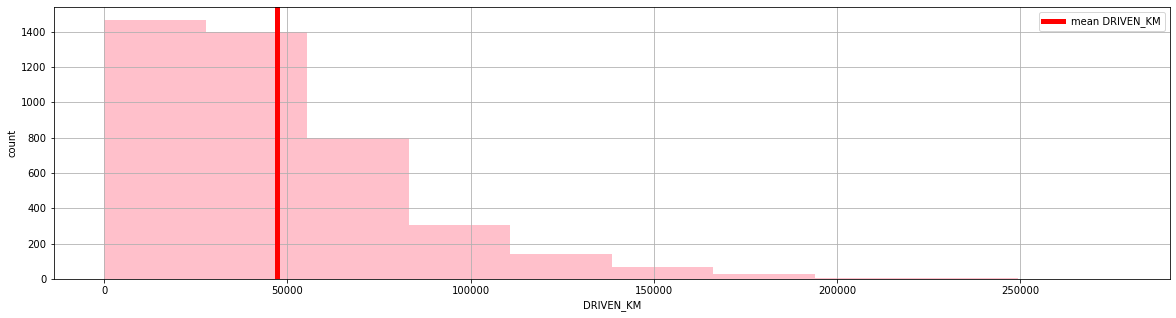

MATHEMATICAL SUMMARY OF PRIZE :
 count      4211.000000
mean      47098.023510
std       34839.406487
min          58.000000
25%       21592.500000
50%       39484.000000
75%       64355.000000
max      276914.000000
Name: DRIVEN_KM, dtype: float64


In [27]:
DF.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.DRIVEN_KM.describe())

# Multivariate Analysis

In [28]:
DF1 = df.copy()

In [29]:
DF1['PRICE'] = DF1['PRICE'].str.replace(r'\D', '').astype(int)
DF1['DRIVEN_KM'] = DF1['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

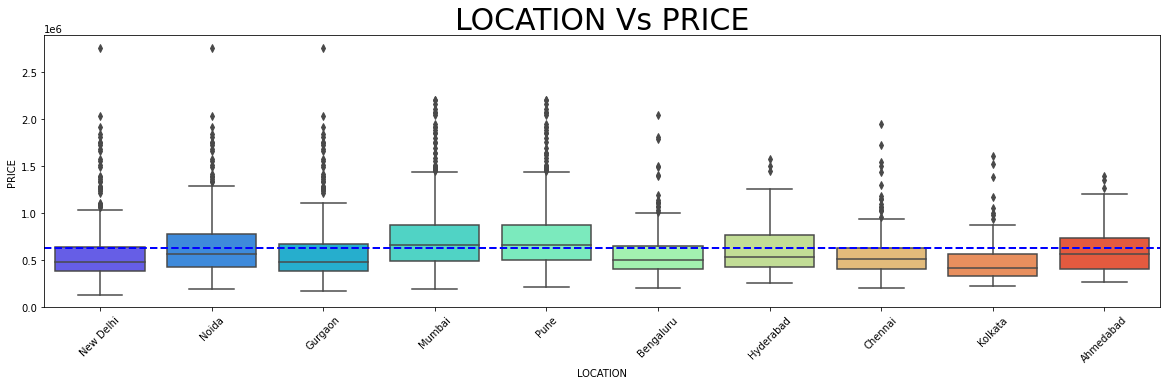

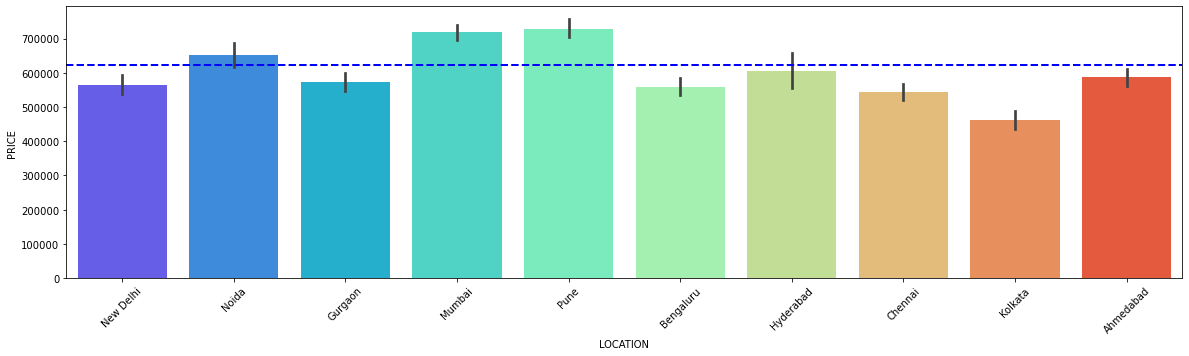

In [30]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

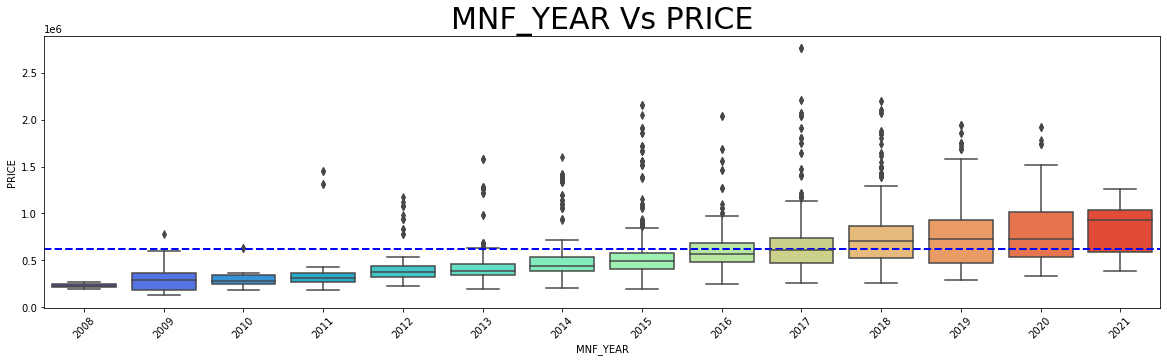

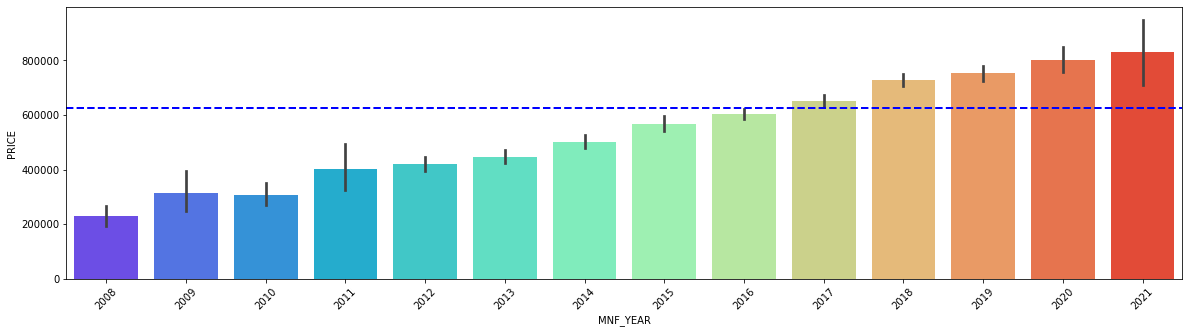

In [31]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key observations:
2019, 2020, 2021 model are being sold higher in PRICE and also above average PRICE.
Above we can understand thatcars sold in lesser kms driven and also in lesser years used are sold in high price.

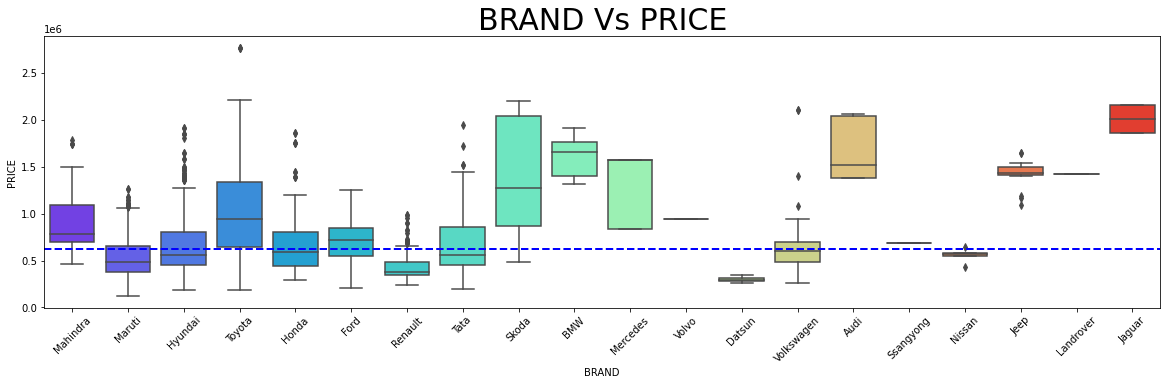

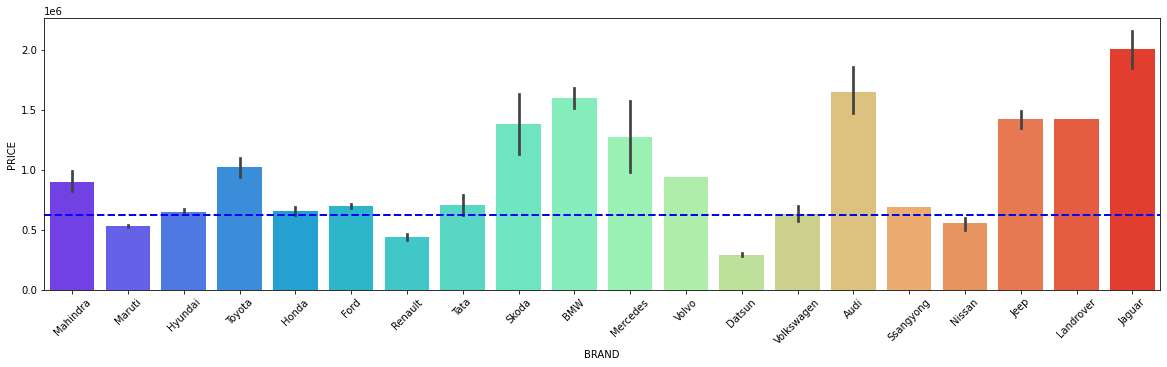

In [32]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Key observations:
When comes to the Brand Land rover are being the costliest in country followed by Jaguar
And most of the other brands including most of the foreign brands are below the PRICE mean line

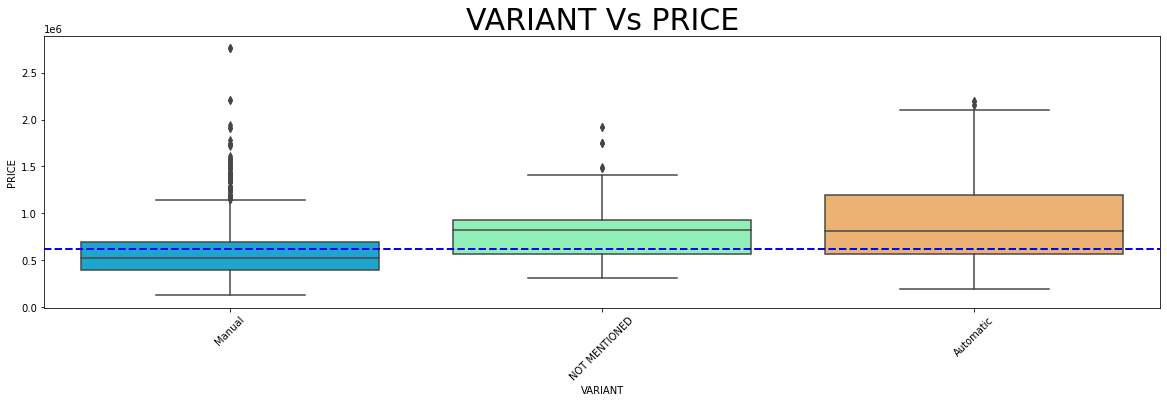

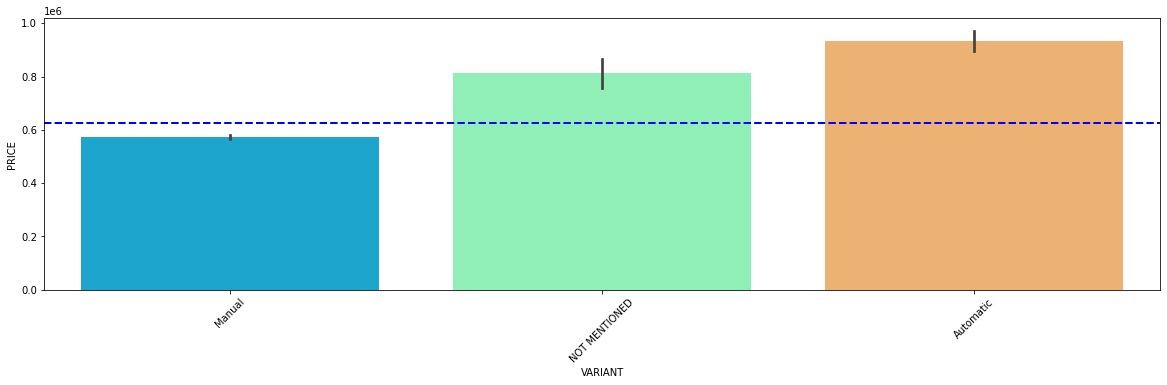

In [33]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

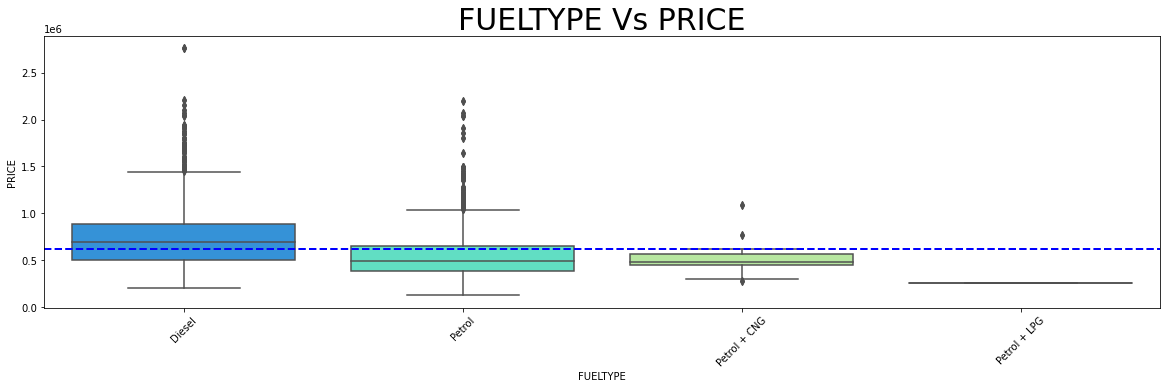

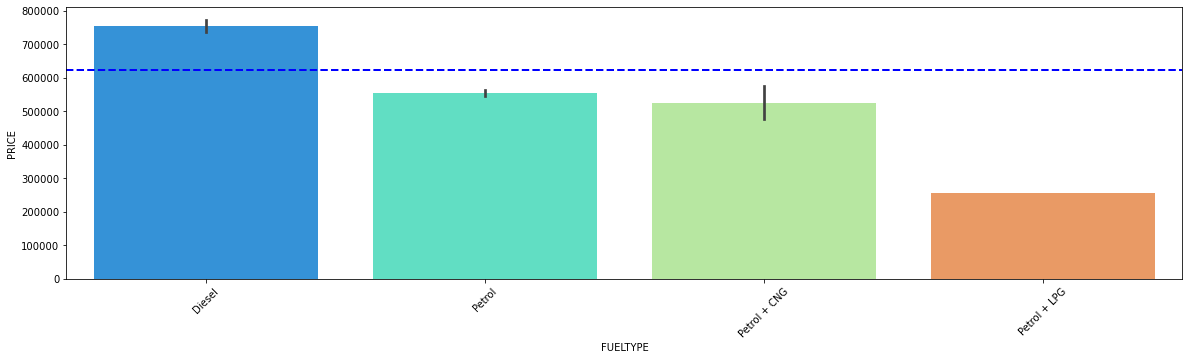

In [34]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

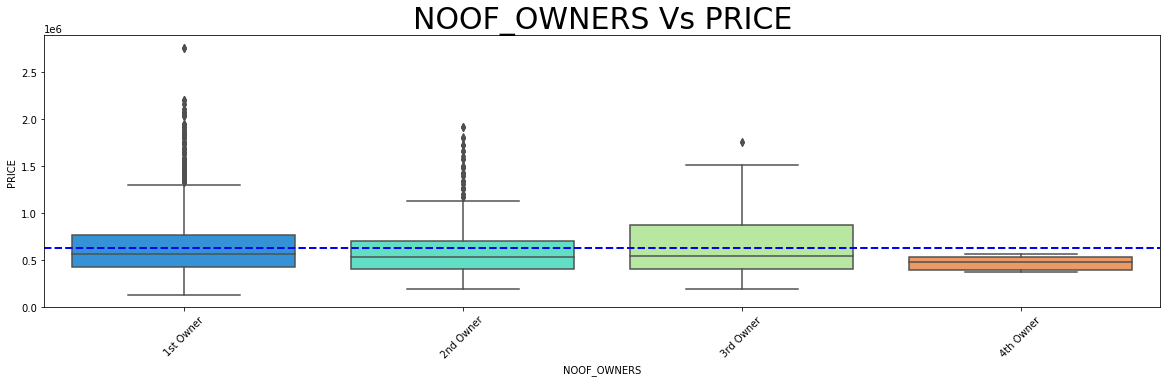

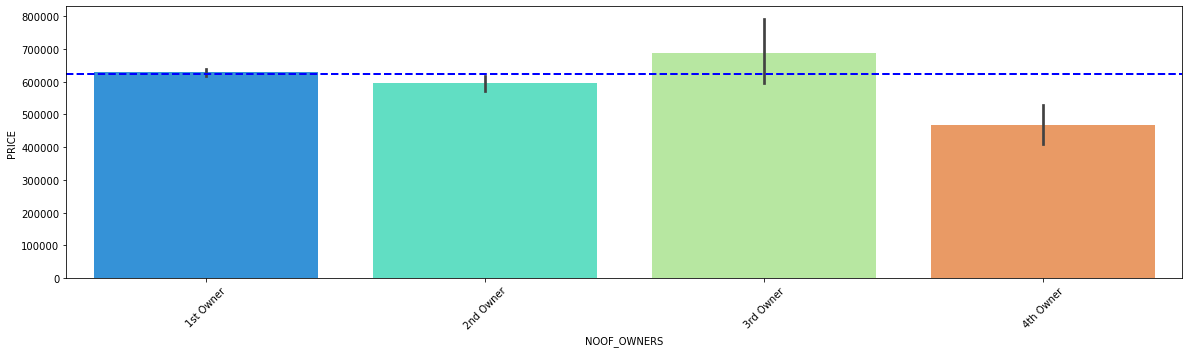

In [35]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("NOOF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

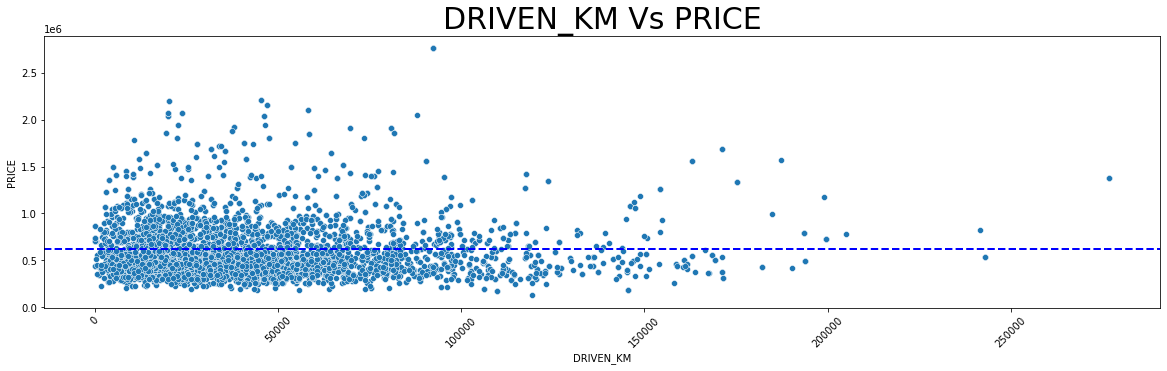

In [36]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.scatterplot(x = 'DRIVEN_KM',y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

# Data Pre-Processing.

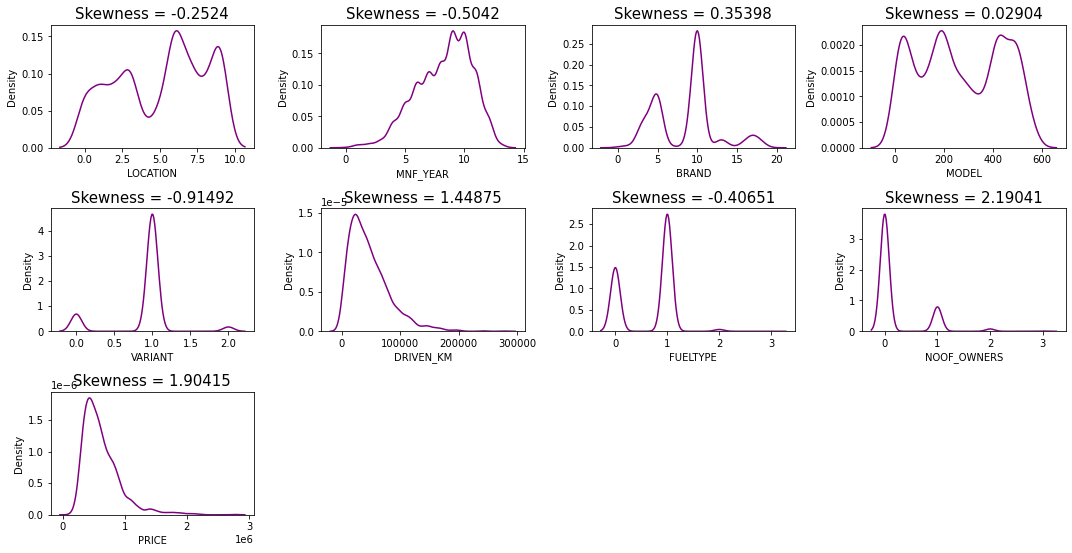

In [37]:
plt.figure(figsize=(15,15))
for i in range (0, len(DF.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[DF.columns[i]], color = "purple")
    plt.title(f"Skewness = {round(DF[DF.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

In [38]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [39]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8308-7765)/8308)*100}%")

Orginal Data (4211, 9)
After Removing outliers (3978, 9)
The percentage of data loss 6.535869041887338%


In [40]:
x_1=DF.drop(["PRICE"], axis = 1)
y_1=DF.PRICE

In [41]:
x_1

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS
0,7,9,9,443,1,19065,0,0
1,7,10,10,489,1,50742,0,0
2,7,8,5,141,2,199598,0,0
3,7,8,5,139,2,53957,0,0
4,7,7,10,384,1,94544,0,0
...,...,...,...,...,...,...,...,...
6893,0,11,10,23,1,14811,1,1
7034,0,9,10,192,1,21029,1,0
7035,0,9,10,217,1,107488,0,1
7036,0,12,10,193,1,1777,1,0


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

# Model Building

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 43.11253515619966 found on randomstate 59


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [45]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [46]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]
model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]


In [47]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.3542021801836118

ERROR:
MEAN ABSOLUTE ERROR:  159582.68064568567
MEAN SQUARED ERROR:  48080320388.01363
ROOT MEAN SQUARED ERROR : 219272.25175113615
R2 SCORE:  0.4311253515619966
**********************************************************************************************************



Score of Lasso() is: 0.3542021800939482

ERROR:
MEAN ABSOLUTE ERROR:  159582.37763770574
MEAN SQUARED ERROR:  48080325416.814545
ROOT MEAN SQUARED ERROR : 219272.26321816116
R2 SCORE:  0.4311252920624482
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.3542021305502592

ERROR:
MEAN ABSOLUTE ERROR:  159570.4761771698
MEAN SQUARED ERROR:  48079627128.04428
ROOT MEAN SQUARED ERROR : 219270.67092532982
R2 SCORE:  0.4311335540452197
**********************************************************************************************************



Score of ElasticNet() is: 

In [48]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.20369941 0.34708933 0.33666362 0.23159962 0.24591659]
MEAN OF SCORE is : 0.27299371494139196
Standard Deviation : 0.057952325299072883
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.20370115 0.34708761 0.33666198 0.23160707 0.24591166]
MEAN OF SCORE is : 0.2729938948754419
Standard Deviation : 0.05795050537913969
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.20372309 0.34704588 0.3366347  0.23185277 0.24599712]
MEAN OF SCORE is : 0.2730507090712556
Standard Deviation : 0.05788556748998616
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.193215   0.26574432 0.2611122  0.34945338 0.22234061]
MEAN OF SCO

In [49]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForestRegressor,0.987097,0.846922,0.043972,47801.890370,9.061313e+09,95190.928615,0.892789
6,DecisionTreeRegressor,1.000000,0.732480,0.131281,48591.954416,1.460797e+10,120863.454940,0.827162
5,KNeighborsRegressor,0.770171,0.548304,0.049450,104123.324596,2.686357e+10,163901.102781,0.682157
2,Ridge,0.354202,0.273051,0.057886,159570.476177,4.807963e+10,219270.670925,0.431134
1,Lasso,0.354202,0.272994,0.057951,159582.377638,4.808033e+10,219272.263218,0.431125
0,LinearRegression,0.354202,0.272994,0.057952,159582.680646,4.808032e+10,219272.251751,0.431125
7,AdaBoostRegressor,0.348641,0.270488,0.199717,205457.625134,6.086496e+10,246708.255271,0.279861
3,ElasticNet,0.306776,0.258373,0.052728,161676.823654,5.246929e+10,229061.750243,0.379196
4,SVR,-0.055169,-0.098130,0.102024,206982.305989,8.835813e+10,297250.955616,-0.045432


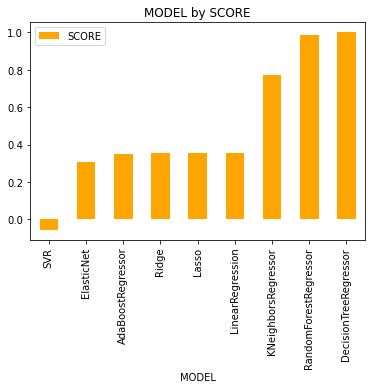

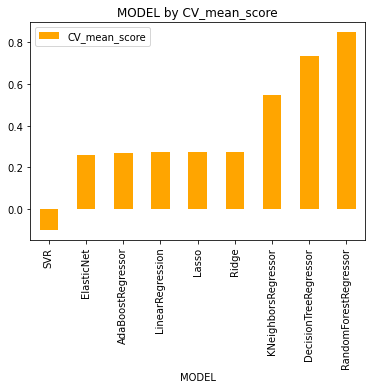

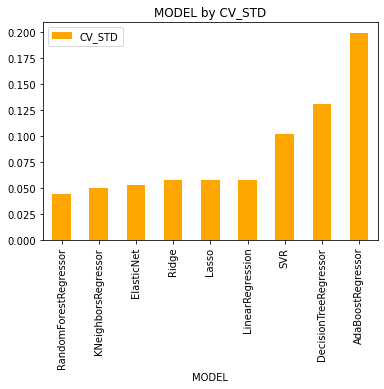

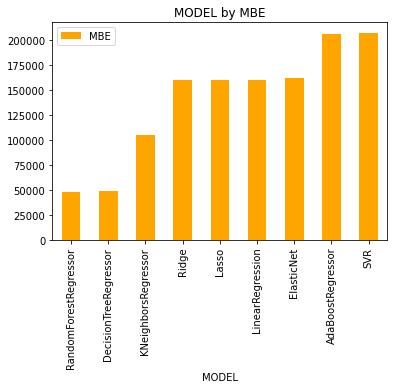

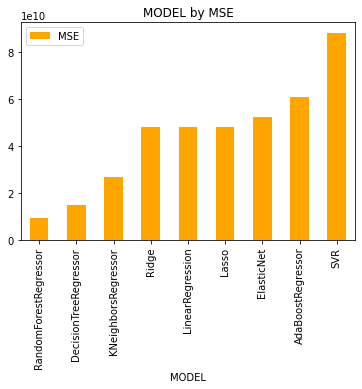

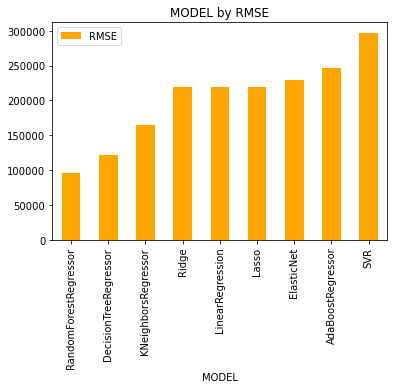

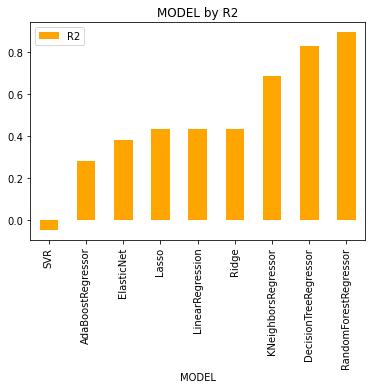

In [50]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From above observation, we can come to a conclusion that Randomforest is the best model with Score of 98.7 lets try in Hyper tuning the same for improved performance and also to reduce the over fitting the Data.

In [51]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

627139.9150316656

In [52]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
predm=rf.predict(x_test)

In [55]:
predm

array([337649., 300666., 582733., ..., 449581., 915389., 858273.])

In [56]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.8927887513343606, 0.9870969242090565)

In [57]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Hyper Parameter Tuning

In [58]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [59]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [61]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='log2', random_state=42)

In [62]:
reg_final_model = grid_search.best_estimator_

In [63]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', random_state=42)

In [64]:
grid_search.best_score_

0.9141220221303341

In [65]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

(0.9847141221556057, 0.9801189343456242)

Saving the final model

In [66]:
import joblib
joblib.dump(reg_final_model,"CAR_PRICE_PRED.obj")

['CAR_PRICE_PRED.obj']